In [7]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt

In [12]:
from pathlib import Path

In [13]:
import pandas as pd

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
import matplotlib.pylab as plt

In [18]:
df = pd.read_csv(r'/Users/Cadat/Documents/Studie/Universiteit van Tilburg/Master Information Management/BLOK 3/Business Intelligence & Data Management/Python/LabSession5/Diabetes.csv')

X = df.drop('Outcome',axis=1).values

y = df['Outcome'].values

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=101)

knn_model = KNeighborsClassifier(n_neighbors=7)

knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [26]:
y_pred = knn_model.predict(X_test)

In [21]:
print(y_pred)
print(y_test)

[1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 1 0 0 0 1 1 0]
[1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0
 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 

In [27]:
import sklearn.metrics as pm
pm.confusion_matrix(y_test,y_pred)

array([[145,  32],
       [ 37,  55]])

In [28]:
tn, fp, fn, tp = pm.confusion_matrix(y_test,y_pred).ravel()
print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)
print("Accuracy: ", (tn+tp)/(tn+tp+fn+fp))
diabetes_recall = tp/(tp+fn)
print("Recall: ", diabetes_recall)
diabetes_precision = tp/(tp+fp)
print("Precision: ", diabetes_precision)
diabetes_f_measure = (2*diabetes_recall*diabetes_precision)/(diabetes_recall+diabetes_precision)
print("F1-Measure: ", diabetes_f_measure)

True Negative:  145
False Positive:  32
False Negative:  37
True Positive:  55
Accuracy:  0.7434944237918215
Recall:  0.5978260869565217
Precision:  0.632183908045977
F1-Measure:  0.6145251396648045


In [29]:
print("Performance measures over testing data set:")
print(" 0 precision is", pm.precision_score(y_test,y_pred))
print(" 0 recall is", pm.recall_score(y_test,y_pred))
print(" 0 f-measure is", pm.f1_score(y_test,y_pred))

Performance measures over testing data set:
 0 precision is 0.632183908045977
 0 recall is 0.5978260869565217
 0 f-measure is 0.6145251396648045


array([[145,  32],
       [ 37,  55]])

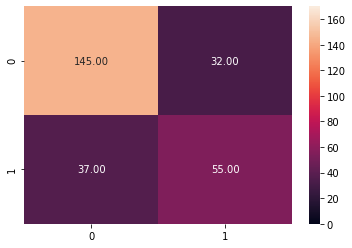

In [30]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(pm.confusion_matrix(y_test,y_pred), annot=True, vmin=0, vmax=170, fmt='.2f')
pm.confusion_matrix(y_test,y_pred)

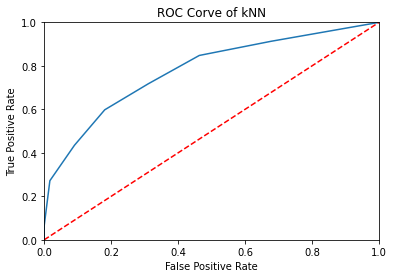

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_scores = knn_model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Corve of kNN')
plt.show()

In [28]:
from pathlib import Path
import pandas as pd

# creating a data frame by loading data from a file
df_file = pd.read_csv(r"/Users/Cadat/Documents/Studie/Universiteit van Tilburg/Master Information Management/BLOK 3/Business Intelligence & Data Management/Python/LabSession5/Iris.csv")

print(df_file)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [29]:
from sklearn.model_selection import train_test_split
x = df_file[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_file['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [30]:
from sklearn.naive_bayes import GaussianNB
model_lr = GaussianNB()
model_lr.fit(x_train, y_train)
predictionA = model_lr.predict([[5.1,2.5,3,1.1]])
predictionB = model_lr.predict([[6.5,3,5.5,1.8]])
predictionC = model_lr.predict([[4.6,3.6,1,0.2]])
print(predictionA)
print(predictionB)
print(predictionC)

['versicolor']
['virginica']
['setosa']


In [36]:
df_file = pd.read_csv(r"/Users/Cadat/Documents/Studie/Universiteit van Tilburg/Master Information Management/BLOK 3/Business Intelligence & Data Management/Python/LabSession5/BreastCancerWisconsinDiagnostic.csv")

#print(df_file)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
del(df_file['id'])

In [34]:
#print(df_file)

In [39]:
df_file.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
x = df_file[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = df_file['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [37]:
print(X_test)

[[  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  3.    187.     70.    ...  36.4     0.408  36.   ]
 [  7.    106.     92.    ...  22.7     0.235  48.   ]
 ...
 [ 13.    153.     88.    ...  40.6     1.174  39.   ]
 [  1.    116.     78.    ...  36.1     0.496  25.   ]
 [  1.     79.     60.    ...  43.5     0.678  23.   ]]


In [35]:
from sklearn.neighbors import KNeighborsClassifier
model_lr = KNeighborsClassifier(n_neighbors=4)
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)

ValueError: Found input variables with inconsistent numbers of samples: [455, 499]

In [3]:
import sklearn.metrics as pm
pm.accuracy_score(y_test,y_pred)

NameError: name 'y_test' is not defined

In [40]:
print(y_pred)
print(y_test)

['B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B'
 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M'
 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M']
107    B
437    B
195    B
141    M
319    B
      ..
19     B
313    B
139    B
495    B
317    M
Name: diagnosis, Length: 114, dtype: object


In [14]:
from sklearn.neighbors import KNeighborsClassifier
model_lr = KNeighborsClassifier(n_neighbors=11)
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)
print("Performance measures over testing data set:")
print(" o accuracy is ", pm.accuracy_score(y_test,y_pred))
print(" o precision is ", pm.precision_score(y_test, y_pred, pos_label='M'))
print(" o recall is ", pm.recall_score(y_test, y_pred, pos_label='M'))
print(" o f-measure is", pm.f1_score(y_test, y_pred, pos_label='M'))

Performance measures over testing data set:
 o accuracy is  0.9649122807017544
 o precision is  1.0
 o recall is  0.9047619047619048
 o f-measure is 0.9500000000000001


from sklearn.neighbors import KNeighborsClassifier
model_lr = KNeighborsClassifier(n_neighbors=8)
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)
print("Performance measures over testing data set:")
print(" o accuracy is ", pm.accuracy_score(y_test,y_pred))
print(" o precision is ", pm.precision_score(y_test, y_pred, pos_label='M'))
print(" o recall is ", pm.recall_score(y_test, y_pred, pos_label='M'))
print(" o f-measure is", pm.f1_score(y_test, y_pred, pos_label='M'))

True Negative:  72
False Positive:  0
False Negative:  4
True Positive:  38
Accuracy:  0.9649122807017544


array([[72,  0],
       [ 4, 38]])

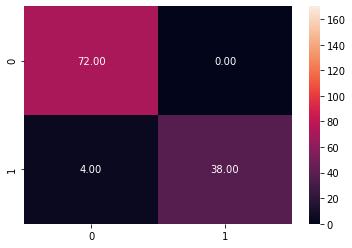

In [12]:
tn, fp, fn, tp = pm.confusion_matrix(y_test,y_pred).ravel()
print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)
print("Accuracy: ", (tp+tn)/(tp+tn+fp+fn))
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(pm.confusion_matrix(y_test,y_pred), annot=True, vmin=0, vmax=170, fmt='.2f')
pm.confusion_matrix(y_test,y_pred)